In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import load_dataset

# 타이타닉 데이터셋 로드
titanic = load_dataset('titanic')


# 결측치 처리
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['fare'].fillna(titanic['fare'].median(), inplace=True)


In [9]:
#AGE
age_freq=titanic['age'].value_counts().sort_index()
#FARE
fare_freq=titanic['fare'].value_counts().sort_index()

In [15]:
age_freq

0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: age, Length: 88, dtype: int64

Age Histogram Bins [ 0.42   8.378 16.336 24.294 32.252 40.21  48.168 56.126 64.084 72.042
 80.   ]
Age Histogram Counts [ 54  46 177 346 118  70  45  24   9   2]
fare Histogram Bins [  0.       51.23292 102.46584 153.69876 204.93168 256.1646  307.39752
 358.63044 409.86336 461.09628 512.3292 ]
fare Histogram Counts [732 106  31   2  11   6   0   0   0   3]


<BarContainer object of 10 artists>

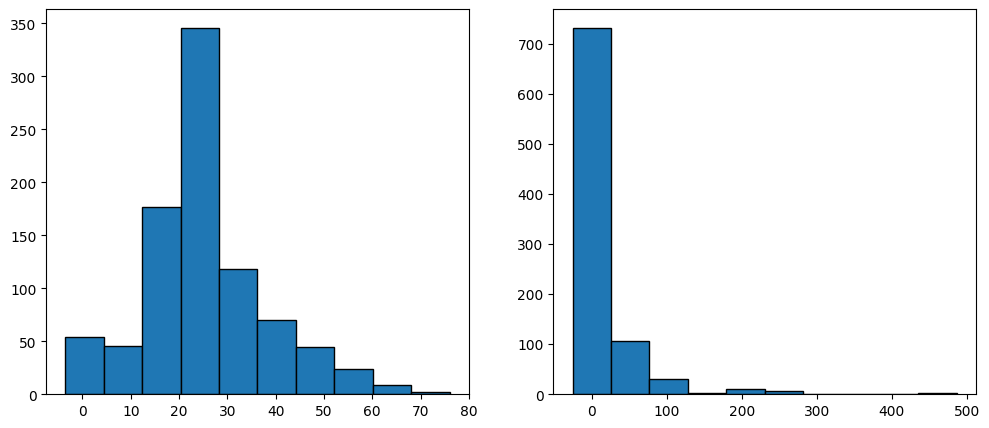

In [23]:
#Age에 대한 도수분포표랑 히스토그램 생성
#numpy 에서 제공하는 histogram
age_hist, age_bins =np.histogram(titanic['age'], bins=10)

fare_hist, fare_bins =np.histogram(titanic['fare'], bins=10)


print('Age Histogram Bins',age_bins)
print('Age Histogram Counts',age_hist)

print('fare Histogram Bins',fare_bins)
print('fare Histogram Counts',fare_hist)


# 시각화를 통해 도수분포표를 그리자
# 2개의 시각화를 통해 확인하자

fig, ax = plt.subplots(1,2, figsize=(12,5))

# Age 히스토그램
ax[0].bar(age_bins[:-1], age_hist, width= np.diff(age_bins), edgecolor ='black')

ax[1].bar(fare_bins[:-1], fare_hist, width= np.diff(fare_bins), edgecolor ='black')


In [19]:
age_hist

array([ 54,  46, 177, 346, 118,  70,  45,  24,   9,   2])

In [20]:
age_bins

array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
       64.084, 72.042, 80.   ])

In [6]:
titanic['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

### 막대그래프

In [33]:
titanic['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

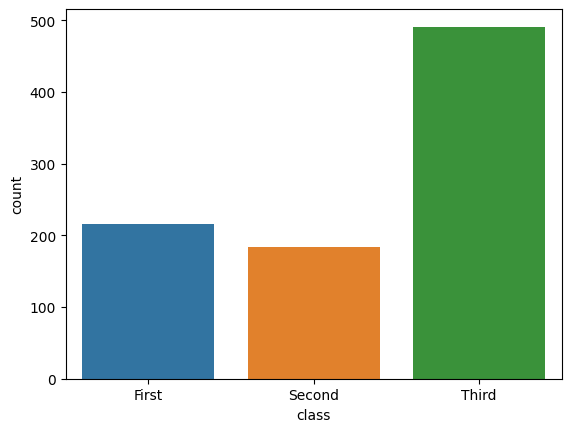

In [32]:
sns.countplot(x='class', data=titanic)

## Effect Size 
- 효과 크기를 비교하는 Cohen's d 효과 크기 계산 
- 두 그룹 간의 차이를 수치로 표현하는 것, 차이가 얼마나 큰지를 나타내는 지표 -> 단순하게 통계적 유의성(p-value) 넘어서 실질적인 그 차이가 얼마나 의미가 있는가? 평가할 때 사용


- 두 집단의 평균의 차이를 표준 편차로 나눈 값 
- 효과 크기를 계산 한 값이 
- 0.2 미만 : 작은 효과
- 0.5 : 중간 효과
- 0.8 이상 : 큰 효과 

In [26]:
# 타이타닉 데이터셋을 가지고 비교할 예정
# 타이타닉 데이터의 요금, 두 그룹-> 생존, 생존하지 못한 그룹 비교할 예정

from scipy.stats import ttest_ind

# 생존자와 비생존자를 출력을 해야 한다.
fare_sur = titanic[titanic['survived']==1]['fare'] #생존자 요금
fare_not_sur = titanic[titanic['survived']==0]['fare'] #생존하지 못한 사람의 요금

In [27]:
fare_sur

1      71.2833
2       7.9250
3      53.1000
8      11.1333
9      30.0708
        ...   
875     7.2250
879    83.1583
880    26.0000
887    30.0000
889    30.0000
Name: fare, Length: 342, dtype: float64

In [28]:
# cohen's 계산함수
def cohens_df(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx+ny-2
    pool_std = np.sqrt(((nx-1) * np.std(x, ddof=1)**2 + (ny-1)*np.std(y, ddof=1)**2)/ dof)
    d = (np.mean(x)-np.mean(y))/ pool_std
    return d 

# Cohen's d 계산
d=cohens_df(fare_sur,fare_not_sur)

In [29]:
print(d)

0.54691006153194
